This notebook contains code used for model EDA and feature engineering

Dependency:

     model_data_prep.py

In [45]:
from pathlib import Path
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_folder = Path.cwd().parents[0].joinpath('data', 'processed_data')

In [3]:
# Read model dataset
model_data_df = pd.read_csv(data_folder.joinpath('model_dataset.csv'))
model_data_df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_secs,number_of_days_used
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0,1.0,0.0,NaN,7.0,20140714.0,41,30,149,...,20170313,0,3.000000,0.000000,0.000000,1.000000,4.000000,7.000000,1368.191040,1.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0,NaN,NaN,NaN,NaN,NaN,40,30,149,...,20170316,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,20060603.0,34,30,149,...,20170331,0,24.846154,1.192308,1.076923,1.153846,27.923077,51.807692,7806.437843,26.0
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,20040330.0,34,30,149,...,20170331,0,9.206897,1.275862,0.793103,2.379310,49.310345,21.310345,12545.216048,29.0
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0,15.0,29.0,male,9.0,20080322.0,34,30,149,...,20170331,0,2.923077,0.923077,0.576923,0.961538,32.961538,26.230769,8618.035774,26.0


In [4]:
# Get memory usage of pandas df (in MB)
sum(model_data_df.memory_usage()/(1024*1024))

174.23575592041016

In [5]:
model_data_df.dtypes

msno                       object
is_churn                    int64
city                      float64
bd                        float64
gender                     object
registered_via            float64
registration_init_time    float64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date           object
membership_expire_date      int64
is_cancel                   int64
avg_num_25                float64
avg_num_50                float64
avg_num_75                float64
avg_num_985               float64
avg_num_100               float64
avg_num_unq               float64
avg_total_secs            float64
number_of_days_used       float64
dtype: object

In [6]:
# Convert the following columns to date type
date_column = ['registration_init_time', 'membership_expire_date']
for col in date_column:
    model_data_df[col] = pd.to_datetime(model_data_df[col], format="%Y%m%d")
model_data_df['transaction_date'] = pd.to_datetime(model_data_df['transaction_date'], format="%Y-%m-%d")

In [7]:
model_data_df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_secs,number_of_days_used
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0,1.0,0.0,NaN,7.0,2014-07-14,41,30,149,...,2017-03-13,0,3.000000,0.000000,0.000000,1.000000,4.000000,7.000000,1368.191040,1.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0,NaN,NaN,NaN,NaN,NaT,40,30,149,...,2017-03-16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,2006-06-03,34,30,149,...,2017-03-31,0,24.846154,1.192308,1.076923,1.153846,27.923077,51.807692,7806.437843,26.0
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,2004-03-30,34,30,149,...,2017-03-31,0,9.206897,1.275862,0.793103,2.379310,49.310345,21.310345,12545.216048,29.0
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0,15.0,29.0,male,9.0,2008-03-22,34,30,149,...,2017-03-31,0,2.923077,0.923077,0.576923,0.961538,32.961538,26.230769,8618.035774,26.0


## EDA

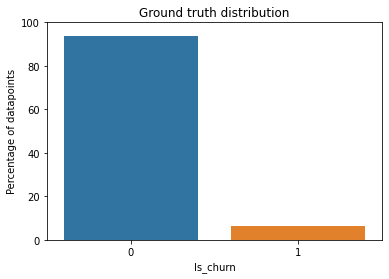

In [8]:
# Ground truth distribution
sns.barplot(data=pd.DataFrame(model_data_df.is_churn.value_counts() /len(model_data_df) * 100).reset_index(), x='index', y='is_churn')
plt.ylim(0,100)
plt.title('Ground truth distribution')
plt.xlabel('Is_churn')
plt.ylabel('Percentage of datapoints')
plt.show()

In [9]:
# Percentage of NA values for each column
(model_data_df.isna()).mean() * 100

msno                       0.000000
is_churn                   0.000000
city                      11.659420
bd                        11.659420
gender                    60.551942
registered_via            11.659420
registration_init_time    11.659420
payment_method_id          0.000000
payment_plan_days          0.000000
plan_list_price            0.000000
actual_amount_paid         0.000000
is_auto_renew              0.000000
transaction_date           0.000000
membership_expire_date     0.000000
is_cancel                  0.000000
avg_num_25                22.737028
avg_num_50                22.737028
avg_num_75                22.737028
avg_num_985               22.737028
avg_num_100               22.737028
avg_num_unq               22.737028
avg_total_secs            22.737028
number_of_days_used       22.737028
dtype: float64

In [10]:
# Number of records with atleast one NA
sum(model_data_df.isna().mean(axis=1) > 0)

626289

About 63% of records have atleast one NA value

## Univariate analysis

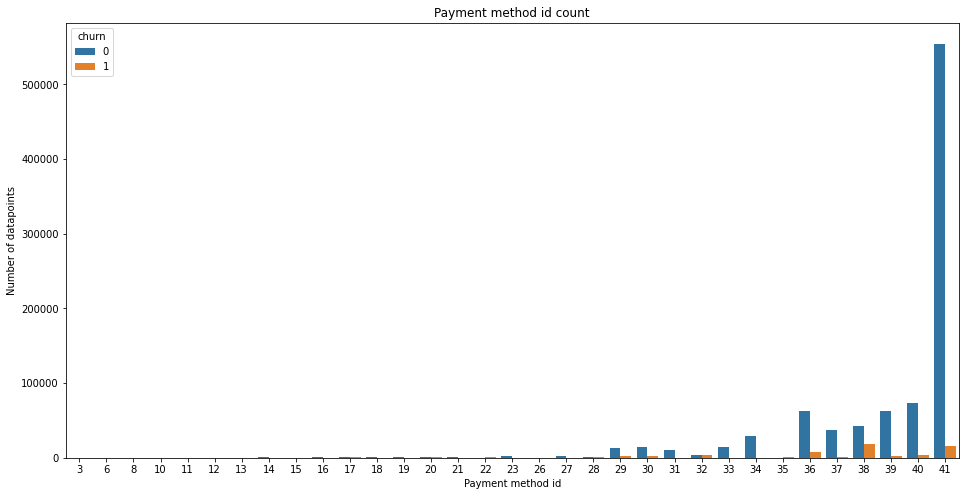

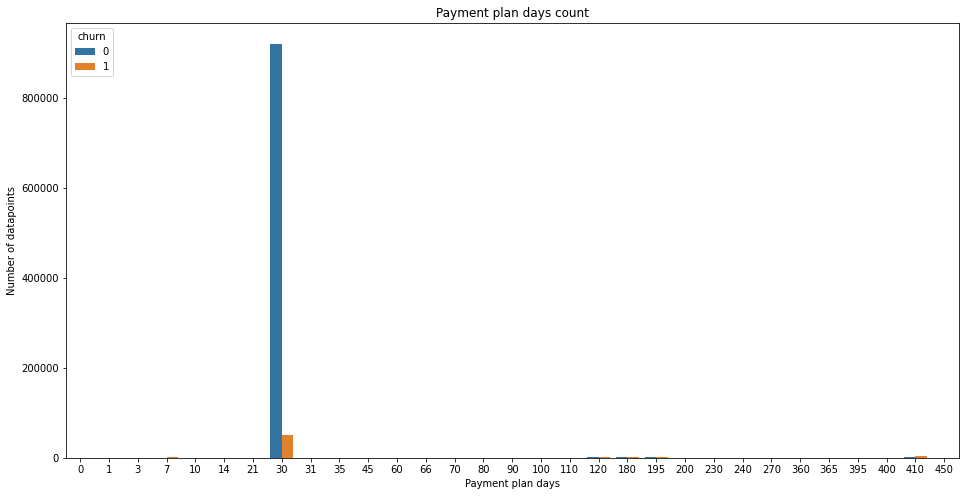

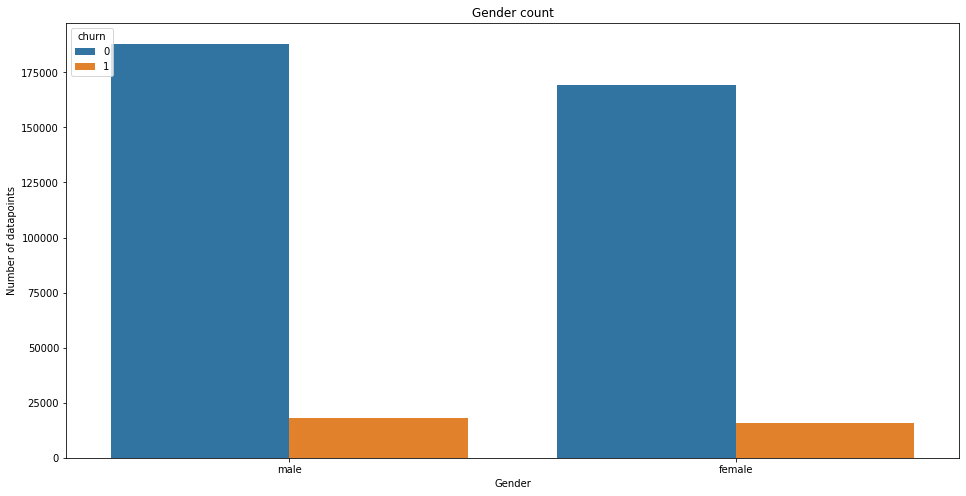

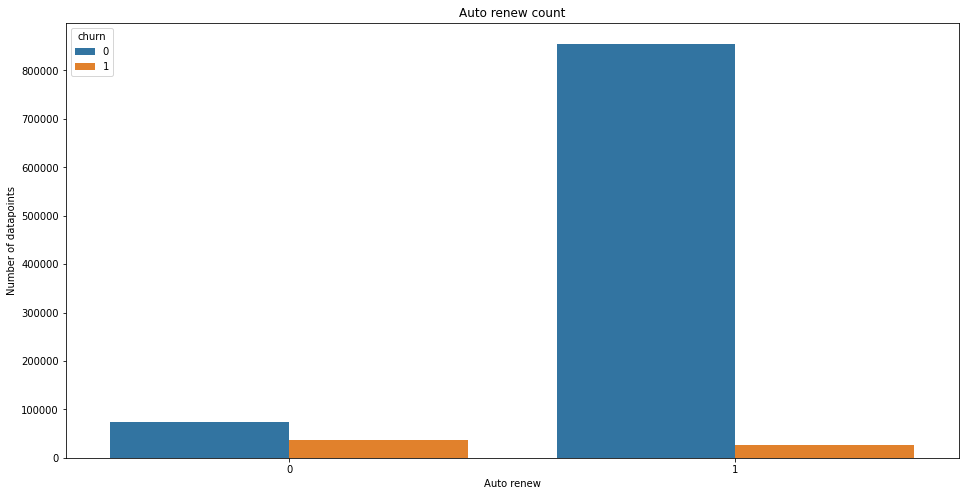

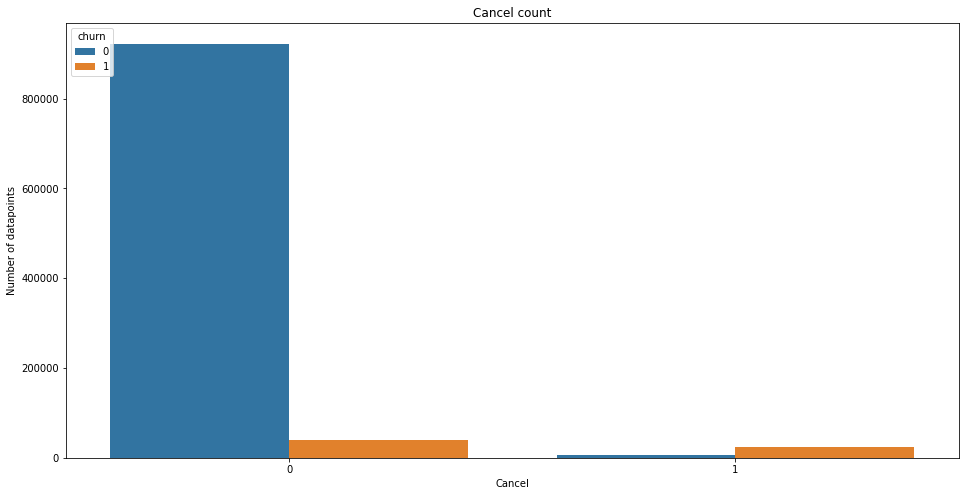

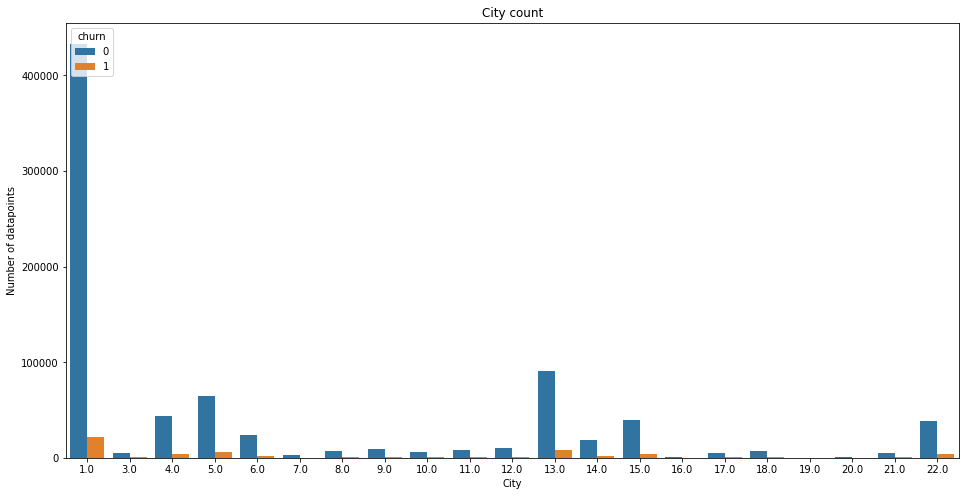

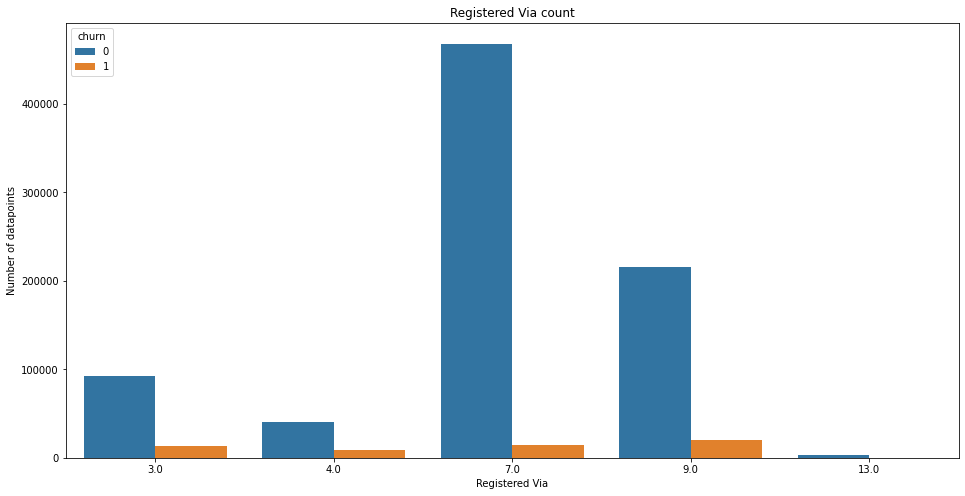

In [11]:
# Count plots for categorical variables
columns = ['payment_method_id', 'payment_plan_days', 'gender', 'is_auto_renew', 'is_cancel', 'city', 'registered_via']
column_names = ['Payment method id', 'Payment plan days', 'Gender', 'Auto renew', 'Cancel', 'City', 'Registered Via']
hue_column = 'is_churn'
hue_legend = 'churn'

for n,col in enumerate(columns):
    # Payment Method distribution
    plt.figure(figsize=(16,8))
    sns.countplot(x=col, hue=hue_column, data = model_data_df)
    plt.title(f'{column_names[n]} count')
    plt.xlabel(column_names[n])
    plt.ylabel('Number of datapoints')
    plt.legend(title=hue_legend, loc=2)
    plt.show()

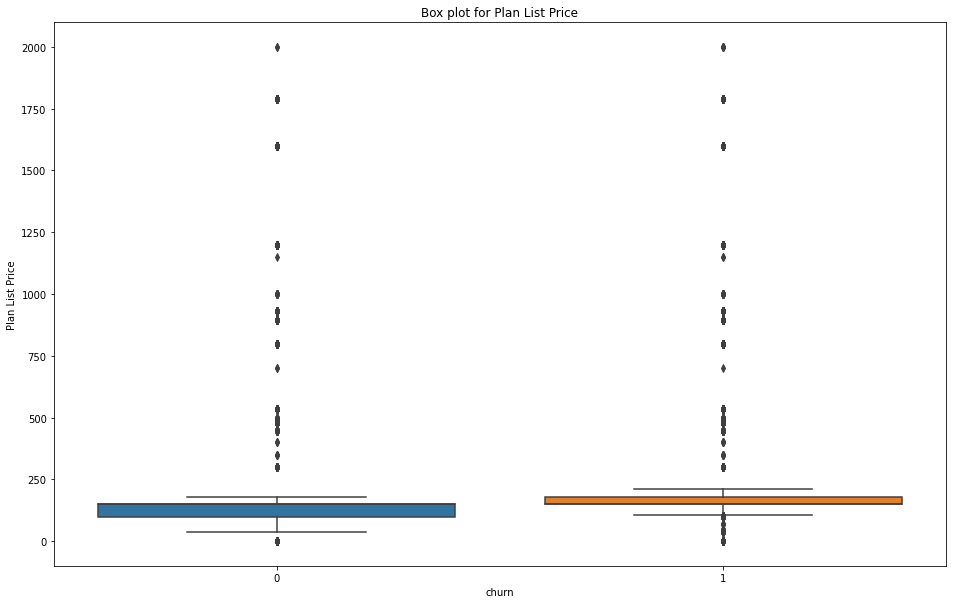

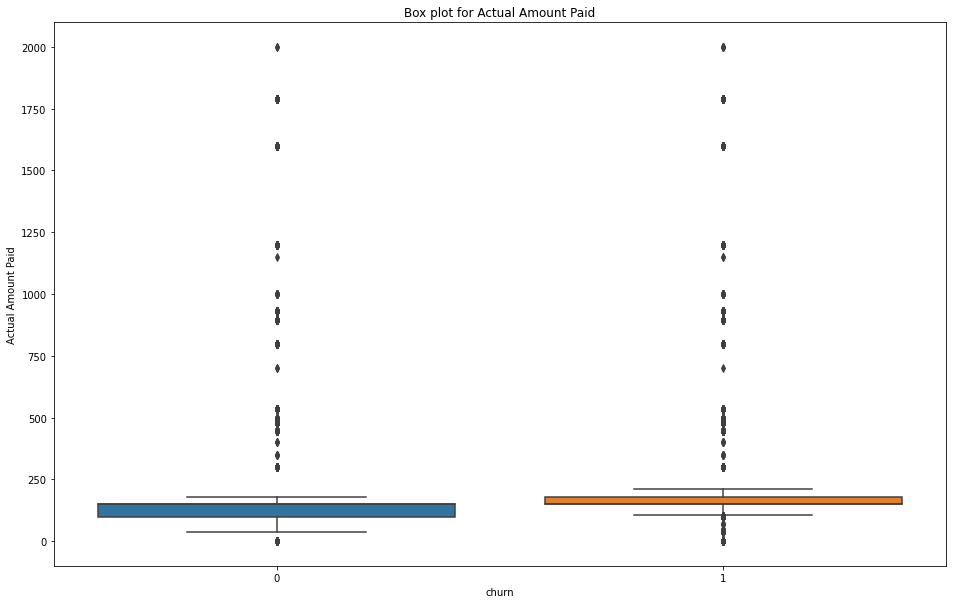

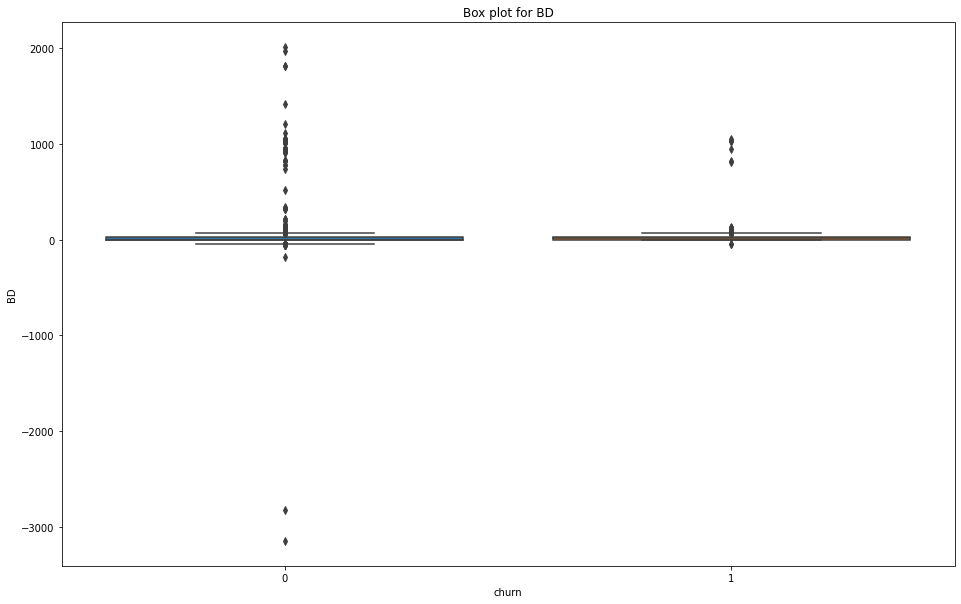

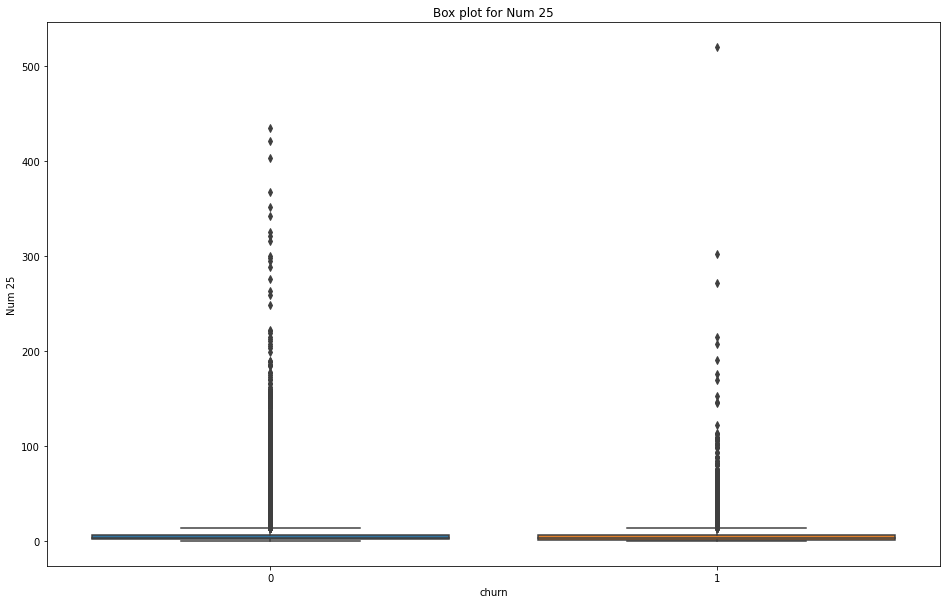

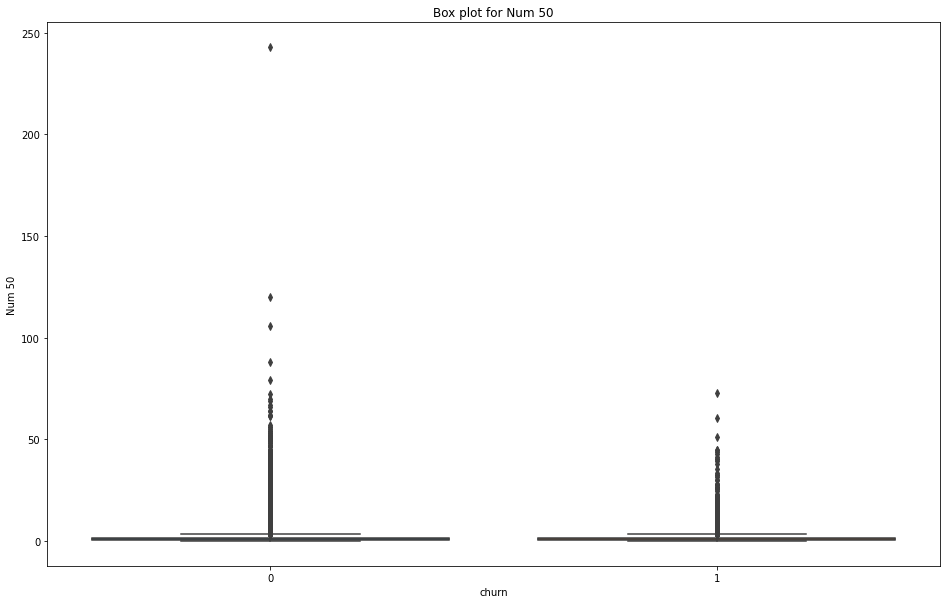

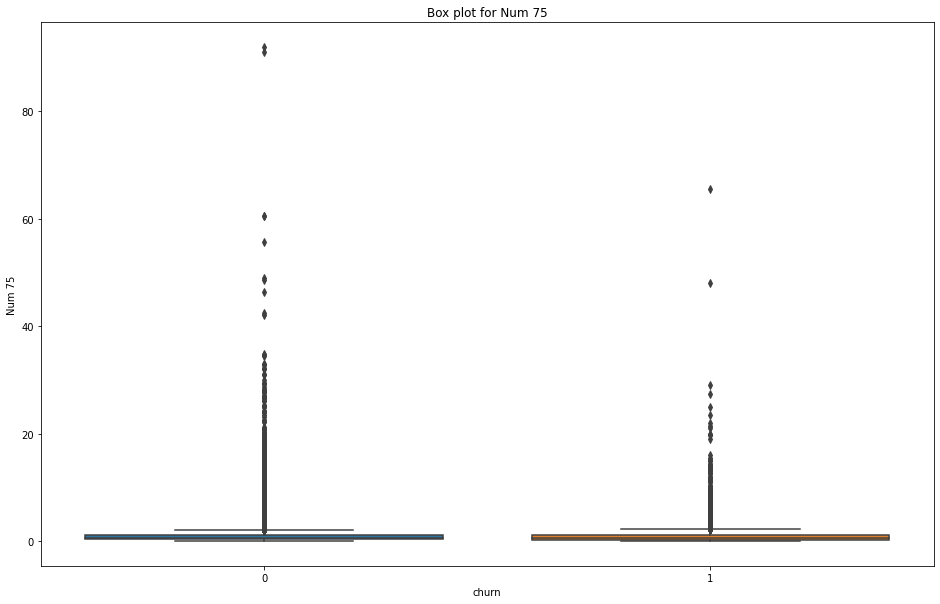

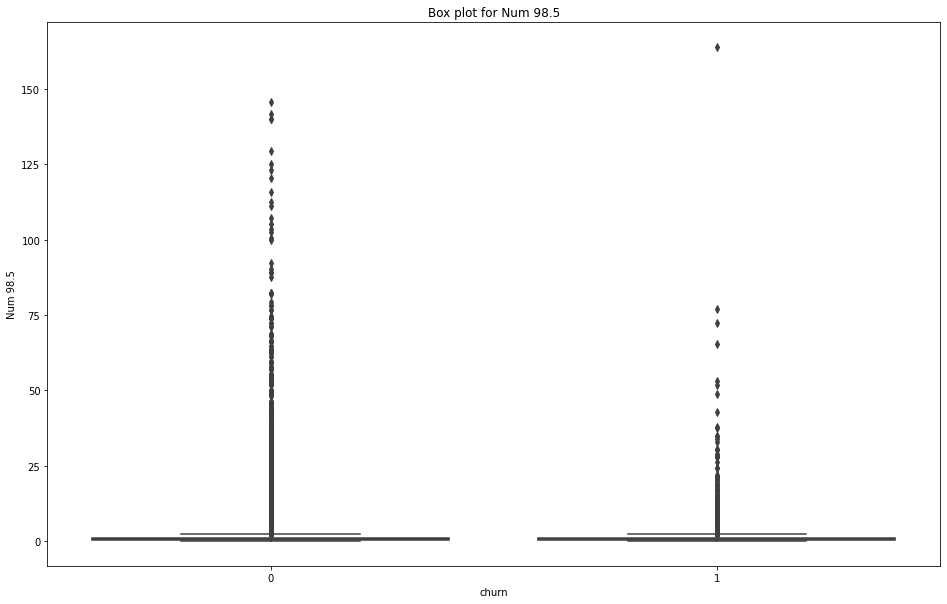

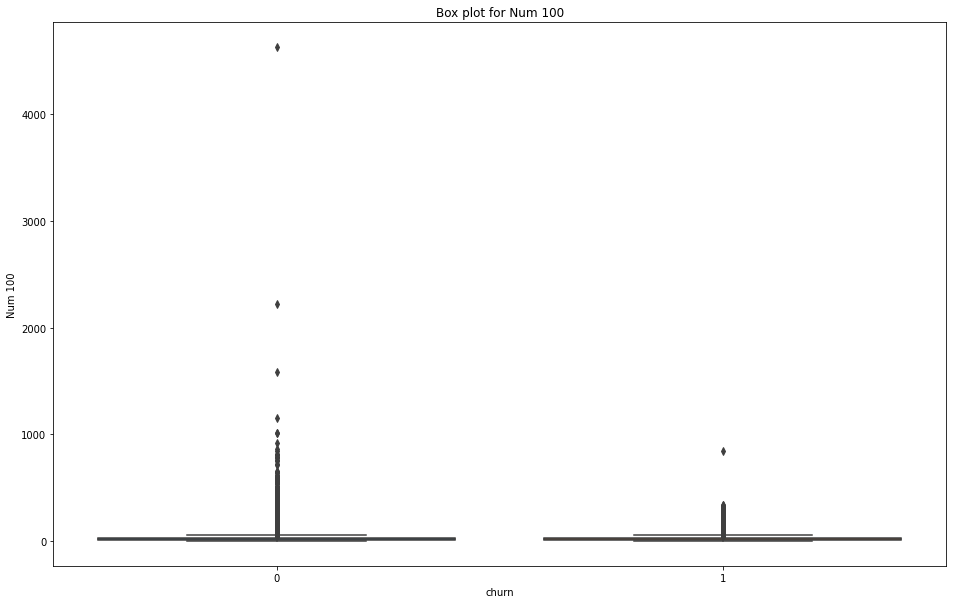

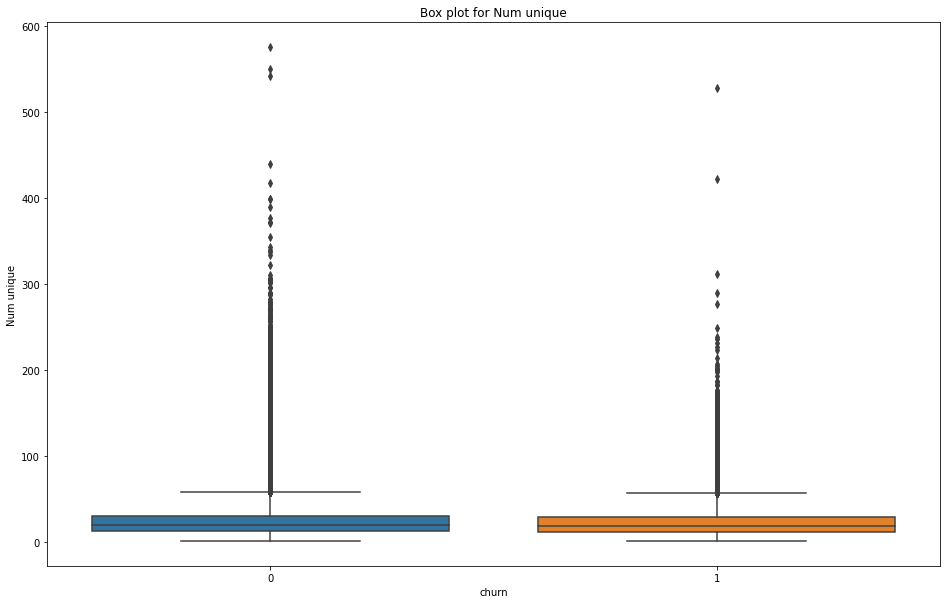

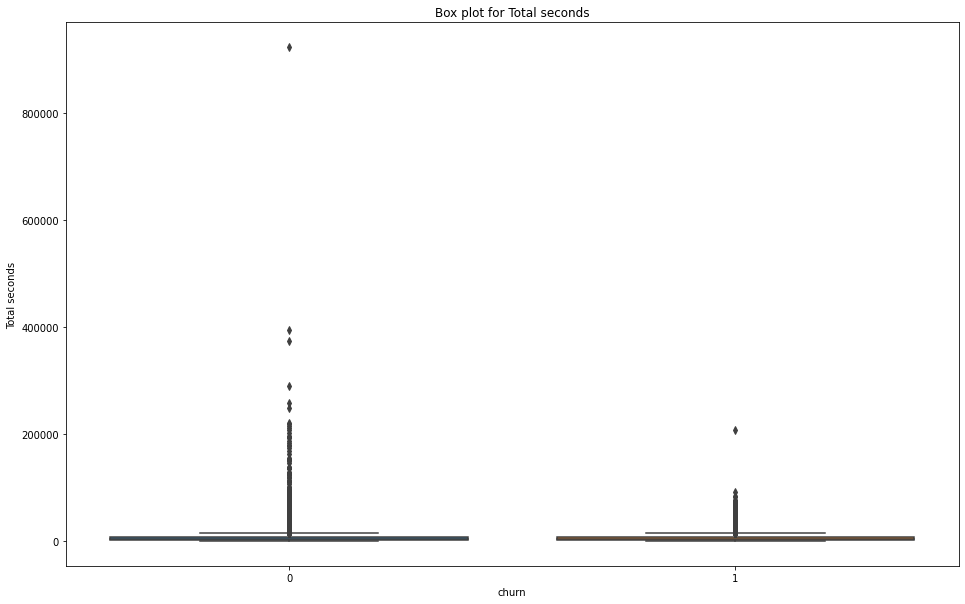

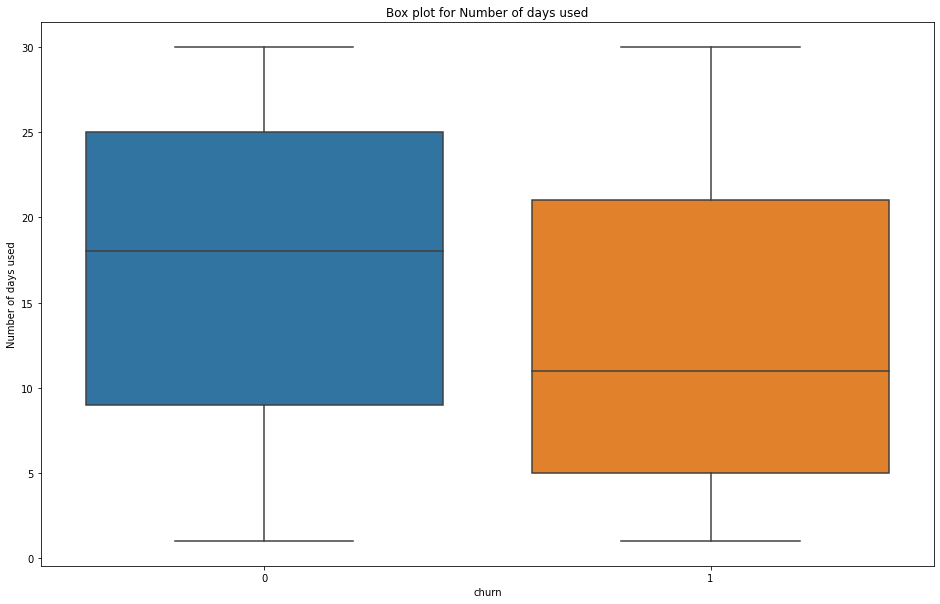

In [12]:
## Boxplot for continuous variables
cont_columns = ['plan_list_price', 'actual_amount_paid', 'bd', 'avg_num_25', 'avg_num_50', 'avg_num_75', 'avg_num_985', 'avg_num_100', 'avg_num_unq', 'avg_total_secs', 'number_of_days_used']
cont_column_names = ['Plan List Price', 'Actual Amount Paid', 'BD', 'Num 25', 'Num 50', 'Num 75', 'Num 98.5', 'Num 100', 'Num unique', 'Total seconds', 'Number of days used']
hue_column = 'is_churn'
hue_legend = 'churn'

for n,col in enumerate(cont_columns):
    plt.figure(figsize=(16,10))
    sns.boxplot(x=hue_column, y=col, data=model_data_df)
    plt.title(f'Box plot for {cont_column_names[n]}')
    plt.ylabel(cont_column_names[n])
    plt.xlabel(hue_legend)
    plt.show()

In [ ]:
## Pairwise plots
#sns.pairplot(model_data_df.loc[:, [col not in ['msno', 'transaction_date', 'membership_expire_date', 'registration_init_time'] for col in model_data_df.columns]], hue='is_churn')

## Feature Engineering

### Price discount feature

In [13]:
# Create a column for price discount
model_data_df['price_discount'] = model_data_df['plan_list_price'] - model_data_df['actual_amount_paid']

In [15]:
sum(model_data_df['price_discount'] < 0) ## There are 5 datapoints whose price discount is negative

5

In [18]:
model_data_df.loc[model_data_df['price_discount'] < 0, :]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,is_cancel,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_secs,number_of_days_used,price_discount
201775,UcsfD5L55ItMPXYR6U6ASsWYcXhH6JBsACmG1KraA/s=,1,13.0,47.0,male,7.0,2013-01-15,31,0,0,...,0,6.30000,2.100000,1.766667,2.000000,24.000000,24.366667,7091.389854,30.0,-149
447480,45UpnCjLzdXmZx6QtGiiylUb6bdaBzwg2UXwukwotrw=,1,13.0,25.0,female,9.0,2014-07-12,38,30,126,...,0,5.62963,0.592593,0.481481,0.592593,20.259259,23.037037,5685.445335,27.0,-1
487902,IC9SswMka7S1+iCPxMjxb9S/cwR1LWdPotaDhrqKxXo=,1,5.0,34.0,male,9.0,2010-05-13,38,30,126,...,0,2.16000,0.280000,0.440000,0.560000,12.360000,14.880000,2977.955497,25.0,-1
751728,VcHjj7QAGN65Z+oKFCa4wTRVRTuUqL8YC419R/bVRSQ=,1,22.0,37.0,male,7.0,2013-07-26,41,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-149
912928,+RBQNQZu3Rni6m5OPOx22x5TzkcKsGhCFVRFEHQtrdk=,1,5.0,46.0,female,9.0,2007-06-24,38,180,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-894


In [19]:
model_data_df.loc[model_data_df['price_discount'] < 0, ['plan_list_price', 'actual_amount_paid']]

,plan_list_price,actual_amount_paid
201775,0,149
447480,126,127
487902,126,127
751728,0,149
912928,0,894


In [22]:
model_data_df.loc[[201775, 751728], 'plan_list_price'] = 149
model_data_df.loc[912928, 'plan_list_price'] = 894
model_data_df.loc[[447480, 487902], 'plan_list_price'] = 127

In [23]:
# Create a column for price discount
model_data_df['price_discount'] = model_data_df['plan_list_price'] - model_data_df['actual_amount_paid']

### Is discount flag feature

In [28]:
model_data_df['is_discount'] = model_data_df['price_discount'].map(lambda x: 1 if x > 0 else 0)

### Create a column for number of days as member (cutoff date is Feb 28, 2017)

In [54]:
model_data_df['cut_off_date'] = '2017-02-28'
model_data_df['cut_off_date'] = pd.to_datetime(model_data_df['cut_off_date'])
model_data_df['num_days_as_member'] = (model_data_df['cut_off_date'] - model_data_df['registration_init_time']).dt.days

In [ ]:
# Save feature engineered dataset
model_data_df.to_csv(data_folder.joinpath('model_dataset_with_feature_engg.csv'), index=False)